In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import keras 
import tensorflow

Using TensorFlow backend.


In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_excel("Concrete_Data.xls")

In [4]:
data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [5]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': "Cement",
                    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' :"Blast_Furnace_Slag",
                    'Fly Ash (component 3)(kg in a m^3 mixture)':"Fly_Ash",
                    'Water  (component 4)(kg in a m^3 mixture)':'Water',
                    'Superplasticizer (component 5)(kg in a m^3 mixture)':"Superplasticizer",
                    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"Coarse_Aggregate",
                    'Fine Aggregate (component 7)(kg in a m^3 mixture)':"Fine_Aggregate", 
                    'Age (day)':"Age",
                    'Concrete compressive strength(MPa, megapascals) ':"Concrete_Compressive_Strength"},inplace=True)

In [7]:
data.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age  Concrete_Compressive_Strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  270                      40.269535  
3             932.0           594.0  365                      41.052780  
4             978.4           825.5  360                      44.296075

##  1. Data Exploration

### 1.1 Data Description 

In [9]:
data.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age                                int64
Concrete_Compressive_Strength    float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast_Furnace_Slag               1030 non-null float64
Fly_Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse_Aggregate                 1030 non-null float64
Fine_Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete_Compressive_Strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
data.describe(include='all')

Cement  Blast_Furnace_Slag      Fly_Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse_Aggregate  Fine_Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete_Compressive_Strength  
count                    1030.000000  
mean                       35.817836  
std                        16.705679  
min                         2.331808  
25%                        23.707115  
50%                        34.442774  
75%                        46.136287  
max                        82.599225

In [12]:
data.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age  Concrete_Compressive_Strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  270                      40.269535  
3             932.0           594.0  365                      41.052780  
4             978.4           825.5  360                      44.296075

In [13]:
data.tail()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse_Aggregate  Fine_Aggregate  Age  Concrete_Compressive_Strength  
1025             870.1           768.3   28                      44.284354  
1026             817.9           813.4   28                      31.178794  
1027             892.4           780.0   28                      23.696601  
1028             989.6           788.9   28                      32.768036  
1029             864.5           761.5   28                      32.401235

In [14]:
X=data.drop(["Concrete_Compressive_Strength"],axis=1)

In [15]:
y=data.Concrete_Compressive_Strength

### 1.2 Creating Plots

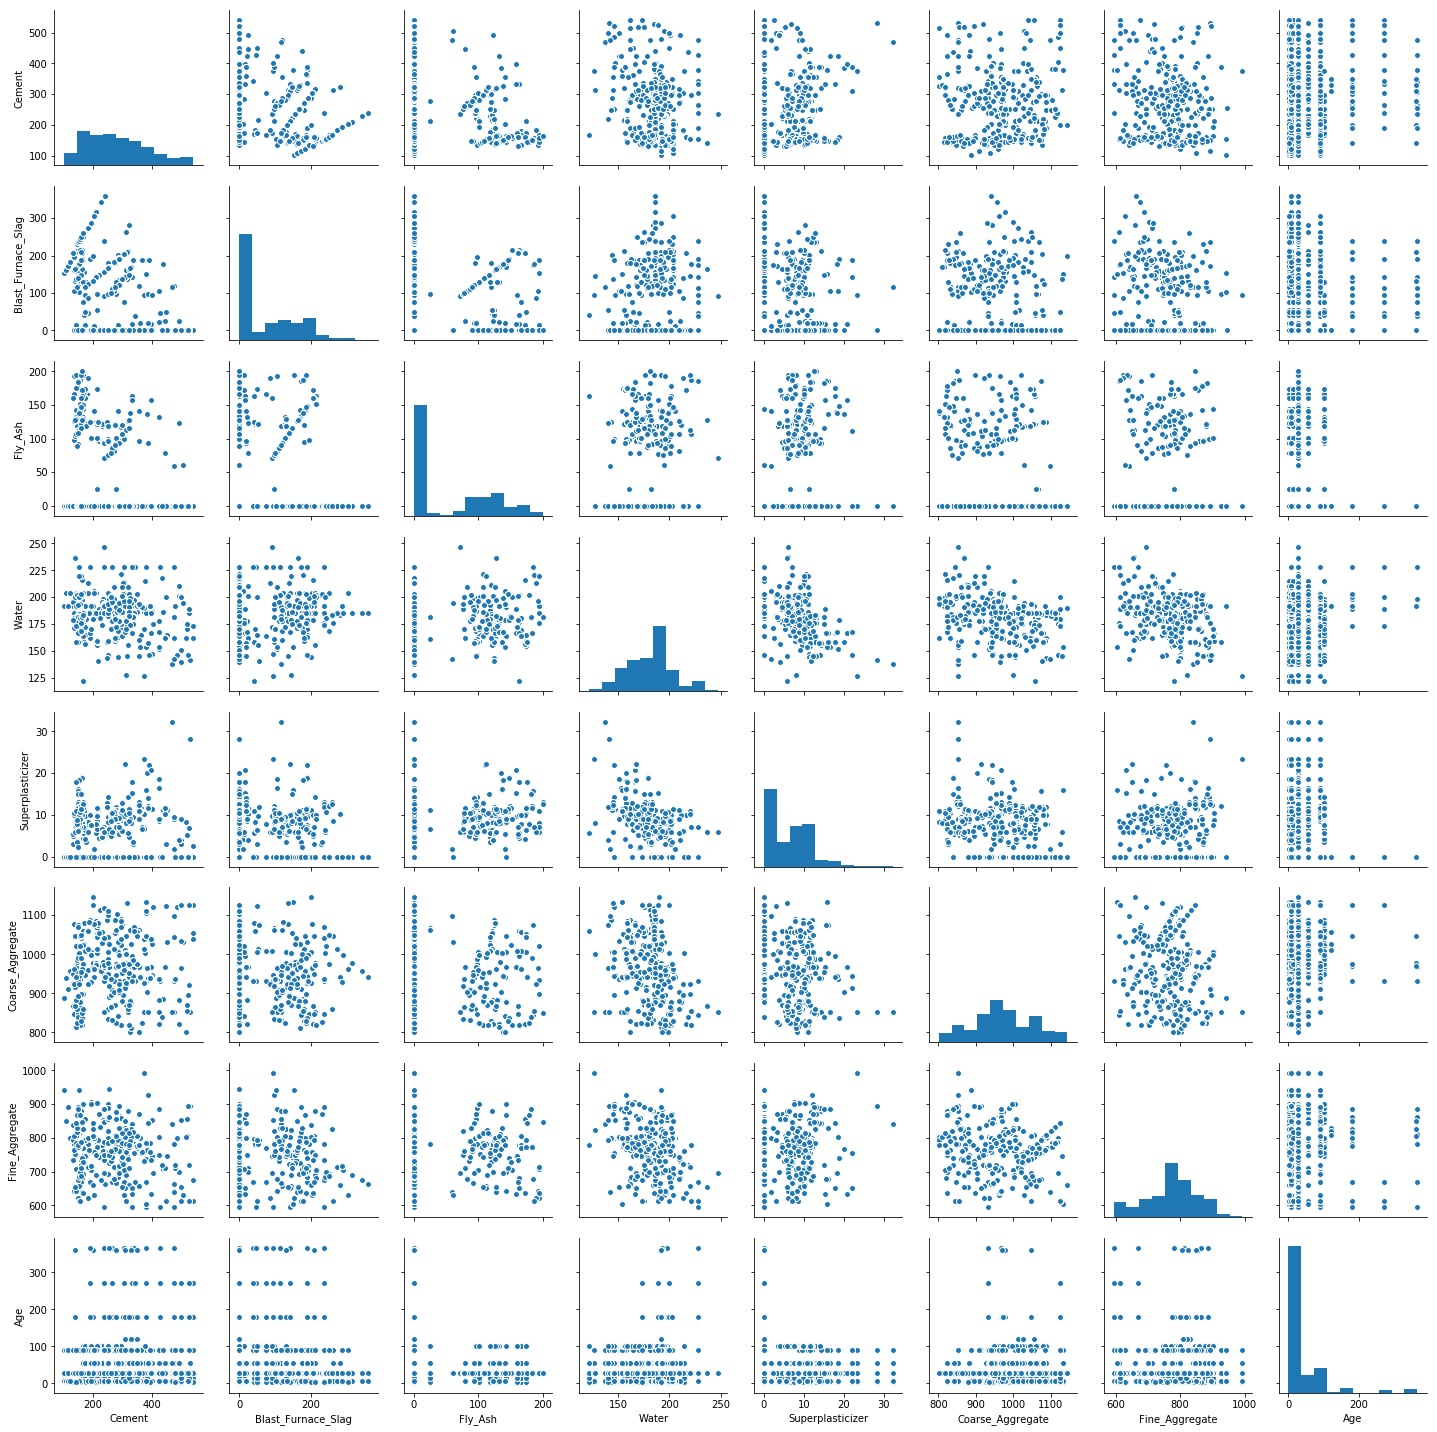

In [16]:
pairplot=sns.pairplot(X,palette="Set2")

In [17]:
pairplot.savefig("Pairplot_Independent_Variables.png",dpi=300)

### 1.3 Missing_Values_Treatment   

In [18]:
data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_Compressive_Strength    0
dtype: int64

As we can see the whole dataset does not have any missing values. So, we don't have to perform any kind of missing value treatment here.

### 1.4 Data_Transformation

### Cement Content

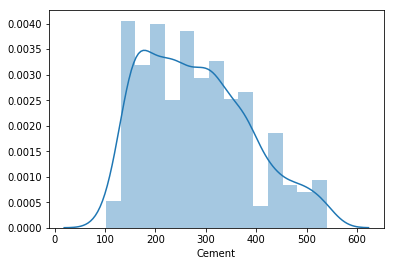

In [19]:
sns.distplot(data.Cement)

In [20]:
data.Cement=np.log(data.Cement)

### Blast_Furnace_Slag

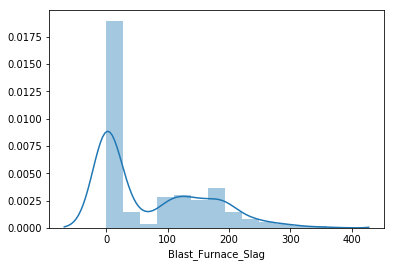

In [21]:
sns.distplot(data.Blast_Furnace_Slag)

In [22]:
data.Blast_Furnace_Slag.mean()

73.89548543689324

In [23]:
def Blast_Furnace_Imputer(value):
    if value==0:
        return(150)
    else:
        return(value)
        

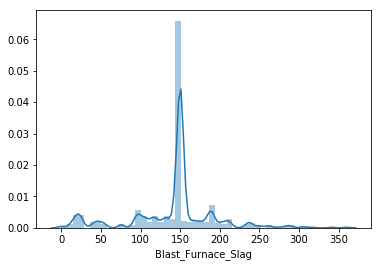

In [24]:
sns.distplot(data.Blast_Furnace_Slag.apply(lambda x: Blast_Furnace_Imputer(x)))

In [26]:
data.Blast_Furnace_Slag=data.Blast_Furnace_Slag.apply(lambda x: Blast_Furnace_Imputer(x))

### Flyash

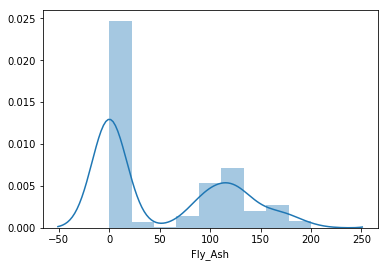

In [27]:
sns.distplot(data.Fly_Ash)

In [28]:
def Flyash_Imputer(value):
    if value==0:
        return(125)
    else:
        return(value)
        

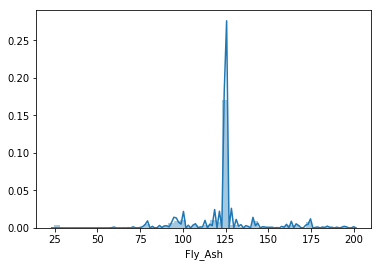

In [29]:
sns.distplot(data.Fly_Ash.apply(lambda x: Flyash_Imputer(x)))

In [30]:
data.Fly_Ash=data.Fly_Ash.apply(lambda x: Flyash_Imputer(x))

### Age

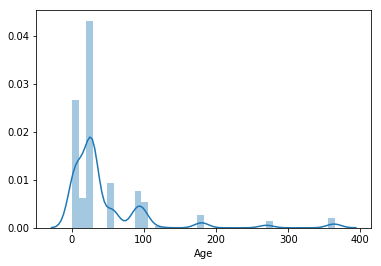

In [31]:
sns.distplot(data.Age)

In [32]:
data.Age=data.Age/365.0

## Processed_Data

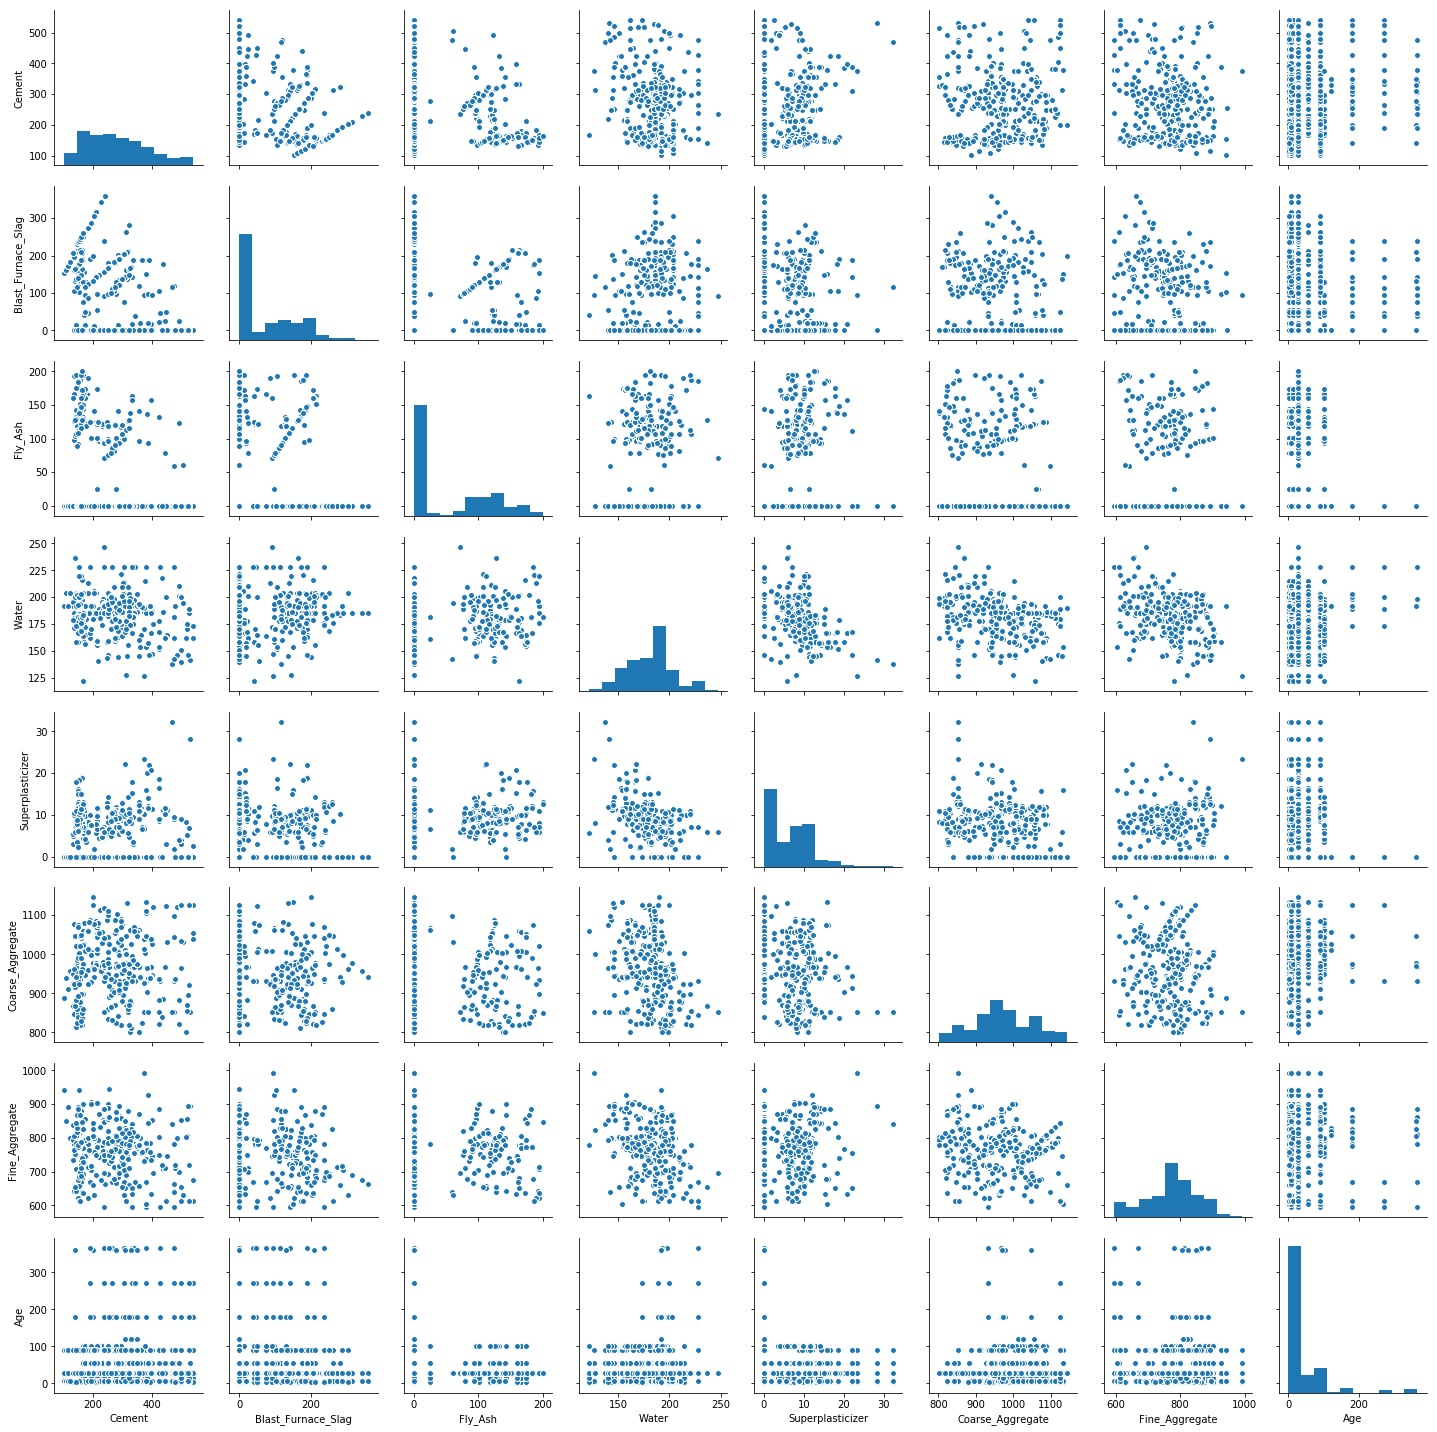

In [33]:
pairplot_2=sns.pairplot(X)

In [86]:
pairplot_2.savefig("Processed_Pairplot.png",dpi=300)

In [34]:
data.to_csv("Processed_Data.csv",index=False)

## 2. Modelling

### 2.1 Base_Model

In [36]:
X=data.drop(["Concrete_Compressive_Strength"],axis=1)

In [37]:
y=data["Concrete_Compressive_Strength"]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [40]:
X_train=sc.fit_transform(X_train)

In [41]:
X_test=sc.transform(X_test)

In [42]:
from keras.layers import Dense
from keras.models import Sequential

In [205]:
Neural_Network=Sequential()
Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))#1st Hidden Layer
Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform')) #2nd Hidden Layer
Neural_Network.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))# Output Layer
Neural_Network.compile(loss='mean_squared_error', optimizer='adam')

In [206]:
Neural_Network.fit(X_train,y_train,batch_size=32, epochs=100)

Epoch 1/100
824/824 [==============================] - 0s - loss: 1553.6089     
Epoch 2/100
824/824 [==============================] - 0s - loss: 1551.1271     
Epoch 3/100
824/824 [==============================] - 0s - loss: 1547.5342     
Epoch 4/100
824/824 [==============================] - 0s - loss: 1542.0057     
Epoch 5/100
824/824 [==============================] - 0s - loss: 1533.5860     
Epoch 6/100
824/824 [==============================] - 0s - loss: 1521.0222     
Epoch 7/100
824/824 [==============================] - 0s - loss: 1503.4787     
Epoch 8/100
824/824 [==============================] - 0s - loss: 1479.9721     
Epoch 9/100
824/824 [==============================] - 0s - loss: 1449.4603     
Epoch 10/100
824/824 [==============================] - 0s - loss: 1411.7675     
Epoch 11/100
824/824 [==============================] - 0s - loss: 1365.9683     
Epoch 12/100
824/824 [==============================] - 0s - loss: 1312.5835     
Epoch 13/100
824/824 [===

## Prediction

In [208]:
pred=Neural_Network.predict(X_test)

## Evaluation

In [101]:
from sklearn.metrics import mean_squared_error

In [184]:
mean_squared_error(y_test,pred)

1622.3779767981302

In [193]:
mean_squared_error(y_test,pred)

228.84884285134564

In [197]:
mean_squared_error(y_test,pred)

150.87697303414433

In [209]:
mean_squared_error(y_test,pred)

229.78877470550066

### Cross Validation

In [217]:
def baseline_model():
    model=Sequential()
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
    model.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [214]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

In [218]:

estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=15)
results = cross_val_score(estimator, X_train, y_train, cv=15)


Epoch 1/100
769/769 [==============================] - 1s - loss: 1521.8877     
Epoch 2/100
769/769 [==============================] - 0s - loss: 1521.8877     
Epoch 3/100
769/769 [==============================] - 0s - loss: 1521.8876     
Epoch 4/100
769/769 [==============================] - 0s - loss: 1521.8877     
Epoch 5/100
769/769 [==============================] - 0s - loss: 1521.8877     
Epoch 6/100
769/769 [==============================] - 0s - loss: 1521.8877     
Epoch 7/100
769/769 [==============================] - 0s - loss: 1521.8876     
Epoch 8/100
769/769 [==============================] - 0s - loss: 1521.8877     
Epoch 9/100
769/769 [==============================] - 0s - loss: 1521.8877     
Epoch 10/100
769/769 [==============================] - 0s - loss: 1521.8877     
Epoch 11/100
769/769 [==============================] - 0s - loss: 1521.8876     
Epoch 12/100
769/769 [==============================] - 0s - loss: 1521.8876     
Epoch 13/100
769/769 [===

## Hypermeter Tuning

In [219]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def baseline_model():
    model=Sequential()
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
    model.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [227]:
estimator = KerasRegressor(build_fn=baseline_model)

In [228]:
parameters = {'batch_size': [15,25, 32],'epochs': [100, 300 ,500]}
grid_search = GridSearchCV(estimator = estimator,param_grid = parameters,cv = 10)

In [229]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
741/741 [==============================] - 0s - loss: 1529.0962     
Epoch 2/100
741/741 [==============================] - 0s - loss: 1526.0940     
Epoch 3/100
741/741 [==============================] - 0s - loss: 1520.4565     
Epoch 4/100
741/741 [==============================] - 0s - loss: 1509.6312     
Epoch 5/100
741/741 [==============================] - 0s - loss: 1490.3595     
Epoch 6/100
741/741 [==============================] - 0s - loss: 1459.2261     
Epoch 7/100
741/741 [==============================] - 0s - loss: 1414.0804     
Epoch 8/100
741/741 [==============================] - 0s - loss: 1352.6006     
Epoch 9/100
741/741 [==============================] - 0s - loss: 1273.6165     
Epoch 10/100
741/741 [==============================] - 0s - loss: 1179.0507     
Epoch 11/100
741/741 [==============================] - 0s - loss: 1069.7273     
Epoch 12/100
741/741 [==============================] - 0s - loss: 949.9992     
Epoch 13/100
741/741 [====

In [233]:
grid_search.best_params_

{'batch_size': 32, 'epochs': 100}

In [249]:
grid_search.best_score_

129.3219090037

## Final Model

In [91]:
import numpy as np
import pandas as pd
import keras
import tensorflow
import sklearn

In [92]:
data=pd.read_csv("Processed_Data.csv")

In [93]:
data.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_Compressive_Strength'],
      dtype='object')

In [94]:
X=data.drop(["Concrete_Compressive_Strength"],axis=1)

In [95]:
y=data["Concrete_Compressive_Strength"]

In [96]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [99]:
Neural_Network=Sequential()
Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))
Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
Neural_Network.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
Neural_Network.compile(optimizer='adam',loss='mean_squared_error')

In [100]:
Neural_Network.fit(X_train,y_train,batch_size=32, epochs=100)
pred=Neural_Network.predict(X_test)
from sklearn.metrics import mean_squared_error
print("\n Mean Squared Error:",mean_squared_error(y_test,pred))

Epoch 1/100
824/824 [==============================] - 0s - loss: 1572.8352     
Epoch 2/100
824/824 [==============================] - 0s - loss: 1570.6898     
Epoch 3/100
824/824 [==============================] - 0s - loss: 1568.1239     
Epoch 4/100
824/824 [==============================] - 0s - loss: 1564.7923     
Epoch 5/100
824/824 [==============================] - 0s - loss: 1560.0957     
Epoch 6/100
824/824 [==============================] - 0s - loss: 1553.5510     
Epoch 7/100
824/824 [==============================] - 0s - loss: 1544.5246     
Epoch 8/100
824/824 [==============================] - 0s - loss: 1532.7703     
Epoch 9/100
824/824 [==============================] - 0s - loss: 1517.6859     
Epoch 10/100
824/824 [==============================] - 0s - loss: 1498.0666     
Epoch 11/100
824/824 [==============================] - 0s - loss: 1470.2393     
Epoch 12/100
824/824 [==============================] - 0s - loss: 1432.9865     
Epoch 13/100
824/824 [===

In [101]:
print("\n Mean Squared Error:",mean_squared_error(y_test,pred))


 Mean Squared Error: 122.381001061


## Model_Saving

In [43]:
from keras.models import model_from_json

In [103]:
model_json = Neural_Network.to_json()
with open("Neural_Network_Model.json", "w") as json_file:
    json_file.write(model_json)

In [104]:
Neural_Network.save_weights("Neural_Network_Weights.h5")

## Model Loading From Disk

In [51]:
# load json and create model
json_file = open('Neural_Network_Model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Neural_Network_Weights.h5")


In [52]:
loaded_model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
pred=loaded_model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(y_test,pred)

122.3810010610331

In [110]:
pred_2[:10]

array([[ 15.27265549],
       [ 27.82995796],
       [ 52.82614136],
       [ 32.3012619 ],
       [ 25.0651207 ],
       [ 32.25550842],
       [ 18.38778496],
       [ 45.03209305],
       [ 29.46387482],
       [ 18.51676369]], dtype=float32)

In [111]:
y_test[:10]

716    10.089792
290    21.504756
620    29.785363
413    15.816579
614    31.253947
287    35.570067
630    17.340321
318    45.367521
957    29.726068
612    25.965666
Name: Concrete_Compressive_Strength, dtype: float64

In [114]:
pred[190:]

array([[ 40.33464432],
       [ 50.33613205],
       [ 34.68382645],
       [ 21.84423447],
       [ 66.17814636],
       [ 27.98588753],
       [ 27.48900223],
       [ 47.07975006],
       [ 23.52658081],
       [ 52.90943527],
       [ 32.60255814],
       [ 56.74697495],
       [ 52.5034523 ],
       [ 35.05613327],
       [ 22.07019997],
       [ 46.62180328]], dtype=float32)

In [122]:
np.array(y_test)-(pred_2)

array([[ -5.1828637 ,   6.23210095,  14.51270771, ...,  10.62130517,
         -4.5423405 ,  63.52755655],
       [-17.74016618,  -6.32520152,   1.95540524, ...,  -1.93599731,
        -17.09964297,  50.97025408],
       [-42.73634957, -31.32138492, -23.04077816, ..., -26.9321807 ,
        -42.09582637,  25.97407068],
       ..., 
       [-24.96634149, -13.55137683,  -5.27077007, ...,  -9.16217261,
        -24.32581828,  43.74407877],
       [-11.98040818,  -0.56544353,   7.71516323, ...,   3.82376069,
        -11.33988498,  56.73001207],
       [-36.5320115 , -25.11704684, -16.83644008, ..., -20.72784263,
        -35.8914883 ,  32.17840876]])

## Other Models

## Gradient Boosting Regressor

In [123]:
from sklearn.ensemble import GradientBoostingRegressor

In [124]:
model_GB=GradientBoostingRegressor()

In [125]:
model_GB.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [127]:
pred_3=model_GB.predict(X_test)

In [128]:
mean_squared_error(y_test,pred_3)

30.823411922569509

In [145]:
for feature,score in zip(X.columns,(model_GB.feature_importances_)*100):
    print(feature,score)

Cement 17.2847849039
Blast_Furnace_Slag 13.4919587443
Fly_Ash 3.75511641226
Water 16.3913208155
Superplasticizer 8.47288894163
Coarse_Aggregate 13.7798108644
Fine_Aggregate 10.5084565825
Age 16.3156627355


In [129]:
model_GB.feature_importances_

array([ 0.17284785,  0.13491959,  0.03755116,  0.16391321,  0.08472889,
        0.13779811,  0.10508457,  0.16315663])

## Linear Regression

In [139]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()

In [133]:
model_LR.fit(X=X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
mean_squared_error(y_test,model_LR.predict(X_test))

112.42745030690304

## Random Forest 

In [147]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor()

In [148]:
model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [149]:
mean_squared_error(y_test,model_RF.predict(X_test))

29.654371695795252

In [150]:
for feature,score in zip(X.columns,(model_RF.feature_importances_)*100):
    print(feature,score)

Cement 27.3755187514
Blast_Furnace_Slag 7.18599489113
Fly_Ash 1.99277428586
Water 15.8057332331
Superplasticizer 6.29571362316
Coarse_Aggregate 3.03689014413
Fine_Aggregate 3.35916515211
Age 34.9482099192


## Support Vector Machine

In [140]:
from sklearn.svm import SVR
model_SVM=SVR()

In [141]:
model_SVM.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [143]:
mean_squared_error(y_test,model_SVM.predict(X_test))

97.649253802087131